In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('car data.csv')

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:

##look for the missing values in the dataset
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [13]:
## checking for the distribution for the categroical data
df.Fuel_Type.value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [15]:
df.Seller_Type.value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [17]:
df.Transmission.value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [19]:
##replacing the values in the categorical variable
df.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)
df.replace({"Seller_Type":{"Dealer":0,"Individual":1}},inplace = True)
df.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace = True)

In [21]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [23]:
## lets divide our dataset into independent and dependent variable
# x is our independent and y is our dependent
x = df.drop(["Car_Name","Selling_Price"],axis=1)
y = df['Selling_Price']


In [25]:
x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [27]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [29]:
## splitting the dataset into training and test set

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1 , random_state = 2)

In [33]:
##import the regression model
from sklearn.linear_model import Lasso
a = Lasso()
a.fit(x_train,y_train)

Lasso()

In [35]:
y_pred_train = a.predict(x_train)

In [37]:
##to calculate the r2 error

In [39]:
from sklearn import metrics
error = metrics.r2_score(y_train , y_pred_train)

In [41]:
error

0.8427856123435794

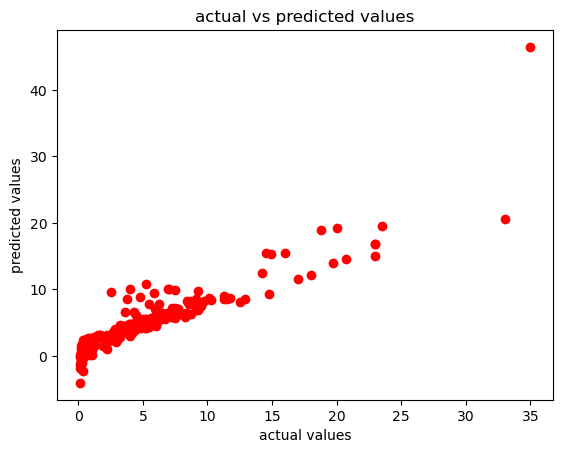

In [43]:
#visualize
plt.scatter(y_train , y_pred_train,color = 'red')
plt.xlabel("actual values")
plt.ylabel("predicted values")
plt.title("actual vs predicted values")
plt.show()

In [45]:
##visualization for the test set

In [47]:
y_pred_test = a.predict(x_test)

In [49]:
error_test = metrics.r2_score(y_test,y_pred_test)

In [51]:
error_test

0.8709167941173195

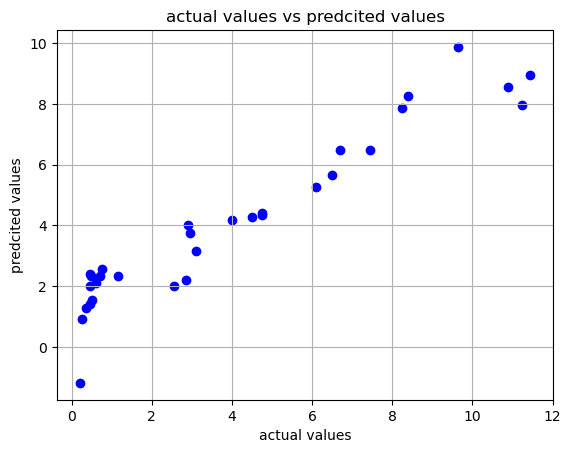

In [53]:
plt.scatter(y_test,y_pred_test,color = 'blue')
plt.xlabel("actual values")
plt.ylabel("predcited values")
plt.title("actual values vs predcited values")
plt.grid("True")
plt.show()